In [393]:
!pip install numpy matplotlib itermplot scipy

     |████████████████████████████████| 28.9 MB 29.0 MB/s eta 0:00:01


In [439]:
import numpy as np
import matplotlib.pyplot as plot
import math
%matplotlib inline

In [442]:
def draw(title, sampler):
    plot.title(title)
    plot.xlabel('Produced jitter')
    plot.ylabel('Frequency')
    plot.xlim(-4,4)
    plot.grid(True, which='both')
    plot.hist(sampler(20000), density=True, histtype='stepfilled', bins=200)
    plot.show()

In [456]:

# use built in python standard normal distribution function as reference
def jitterIdeal(n):
    from numpy.random import default_rng
    rng = default_rng()
    v = rng.normal(0, 1, n)
    return v

# R's qnorm approximation
def jitterQ(n):
    values = []
    for x in range(n):
        r, u, v = 0, 0, 0
        while r < 0.001 or r > 1: # truncate tails
            u, v = np.random.rand(2) * 2 - 1
            r = u * u + v * v
        num = u * math.sqrt(-2 * math.log(r) / r)
        
        values.append(num)
    return values

# use box-muller to generate standard normal distribution
def jitterBoxMuller(n):
    values = []
    for x in range(n):
        u, v = 0, 0
        while u < 0.001 or v < 0.001: # truncate tails
            u, v = 1 - np.random.rand(2)
        num = math.sqrt(-2 * math.log(u)) * math.cos(2 * math.pi * v)
        values.append(num)
    return values

# cosine as implemented (don't use this!)
def jitterCosIncorrect(n):
    values = []
    for i in range(n):
        x = (np.random.rand(1)[0] * 2 - 1)
        v = math.cos(x * math.pi)
        values.append(v)
    return values

# cosine a more correct version (don't use this either)
def jitterCos(n):
    values = []
    for i in range(n):
        r = np.random.rand(1)[0] * 2 - 1
        v = math.atan2(r, math.sqrt(1 - r * r)) * 2
        values.append(v)
    return values

# a reference logistic distribution
def jitterLogistic(n):
    from scipy.stats import logistic
    return logistic.rvs(size=n)

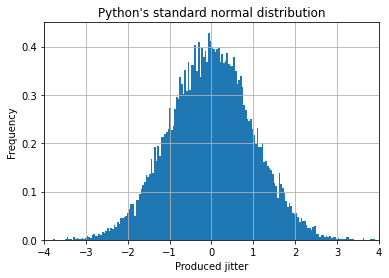

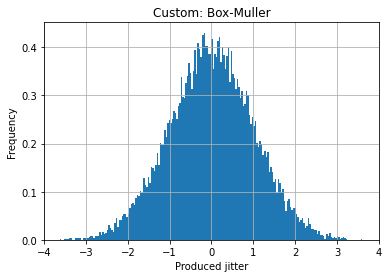

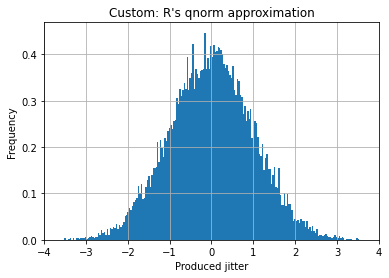

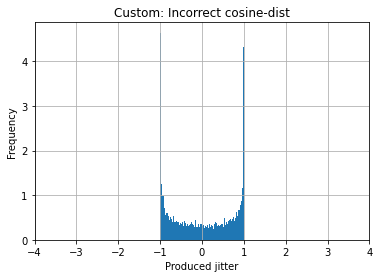

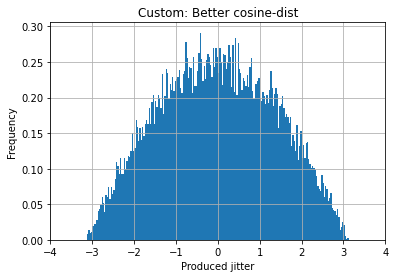

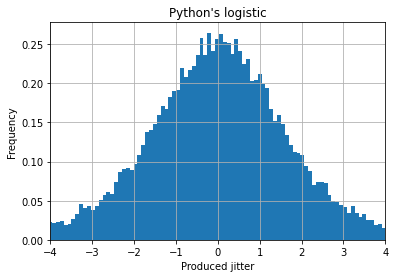

In [458]:
draw("Python's standard normal distribution", jitterIdeal)
draw("Custom: Box-Muller", jitterBoxMuller)
draw("Custom: R's qnorm approximation", jitterQ)
draw("Custom: Incorrect cosine-dist", jitterCosIncorrect)
draw("Custom: Better cosine-dist", jitterCos)
draw("Python's logistic", jitterLogistic)